In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd 'drive/MyDrive/LU_Research'
!ls

/content/drive/MyDrive/LU_Research
 ALL_Bagging_SELECT.ipynb       ALL_XGBOOST_V2.ipynb
 ALL_Bagging_V1.ipynb	        ALL_XGBOOST_V3.ipynb
 ALL_Bagging_V2.ipynb	        ANN_V1.ipynb
 ALL_dense_final.ipynb	       'dense_NN (1).ipynb'
 ALL_dense_final_v2.ipynb       get_data_v1.ipynb
 ALL_DENSE_V1.ipynb	        get_data_v2.ipynb
 all_GNAIVE_BAYES_Graph.ipynb   Inst_ALL_RFOREST_V1.ipynb
 all_GNAIVE_BAYES_V1.ipynb      KNN_V1_10_90.ipynb
 all_GNAIVE_BAYES_V2.ipynb      LR_V1.ipynb
 ALL_KNN_Select_K.ipynb         MLP_v1_10_90.ipynb
 ALL_KNN_V1.ipynb	        NB_V1.ipynb
 ALL_KNN_V2.ipynb	       'PANCANCER_ANOVA_Sun Nov 20 23_09_56 2022 (1).csv'
 ALL_KNN_V3.ipynb	        PPI_v1.ipynb
 ALL_LSTM_v1.ipynb	        PPI_v2.ipynb
 ALL_LSTM_v2.ipynb	        PPI_V3.ipynb
 ALL_MLP_Select.ipynb	        RFE_v1.ipynb
 ALL_MLP_v1.ipynb	        RNN_V1.ipynb
 ALL_MLP_v2.ipynb	        RNN_v2.ipynb
 ALL_RFOREST_select.ipynb       RNN_v3.ipynb
 ALL_RFOREST_V1.ipynb	        SelectK_RNN_v2.ipynb
 ALL_RFOREST_V2.i

In [3]:
import pandas as pd
import os
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df=pd.read_csv('PANCANCER_ANOVA_Sun Nov 20 23_09_56 2022 (1).csv')
print(df.shape)
df.head()

(200920, 22)


,Drug name,Drug ID,Drug target,Target Pathway,Feature Name,n_feature_pos,n_feature_neg,ic50_effect_size,log_ic50_mean_pos,log_ic50_mean_neg,log_max_conc_tested,log_max_conc_tested_2,feature_ic50_t_pval,feature_delta_mean_ic50,feature_pos_ic50_var,feature_neg_ic50_var,feature_pval,tissue_pval,msi_pval,fdr,Tissue Type,Screening Set
0,Camptothecin,1003,TOP1,DNA replication,ABCB1_mut,16,949,0.558749,-1.246496,-2.272739,NaN,NaN,0.020408,1.026243,1.573705,1.840537,0.064075,0.0,0.104496,63.648775,PANCANCER,GDSC2
1,Camptothecin,1003,TOP1,DNA replication,ABL2_mut,7,958,0.372950,-2.937134,-2.250744,NaN,NaN,0.406853,-0.686390,2.032137,1.839168,0.863591,0.0,0.105126,91.654724,PANCANCER,GDSC2
2,Camptothecin,1003,TOP1,DNA replication,ACACA_mut,11,954,0.159477,-1.965458,-2.259070,NaN,NaN,0.531182,0.293612,1.490027,1.844422,0.849671,0.0,0.105125,91.388313,PANCANCER,GDSC2
3,Camptothecin,1003,TOP1,DNA replication,ACVR1B_mut,3,962,0.984927,-0.450478,-2.261353,NaN,NaN,0.292018,1.810875,2.213107,1.837730,0.288981,0.0,0.104923,73.552206,PANCANCER,GDSC2
4,Camptothecin,1003,TOP1,DNA replication,ACVR2A_mut,22,943,0.037908,-2.187514,-2.257315,NaN,NaN,0.818542,0.069801,1.382058,1.850267,0.418768,0.0,0.105011,80.649802,PANCANCER,GDSC2


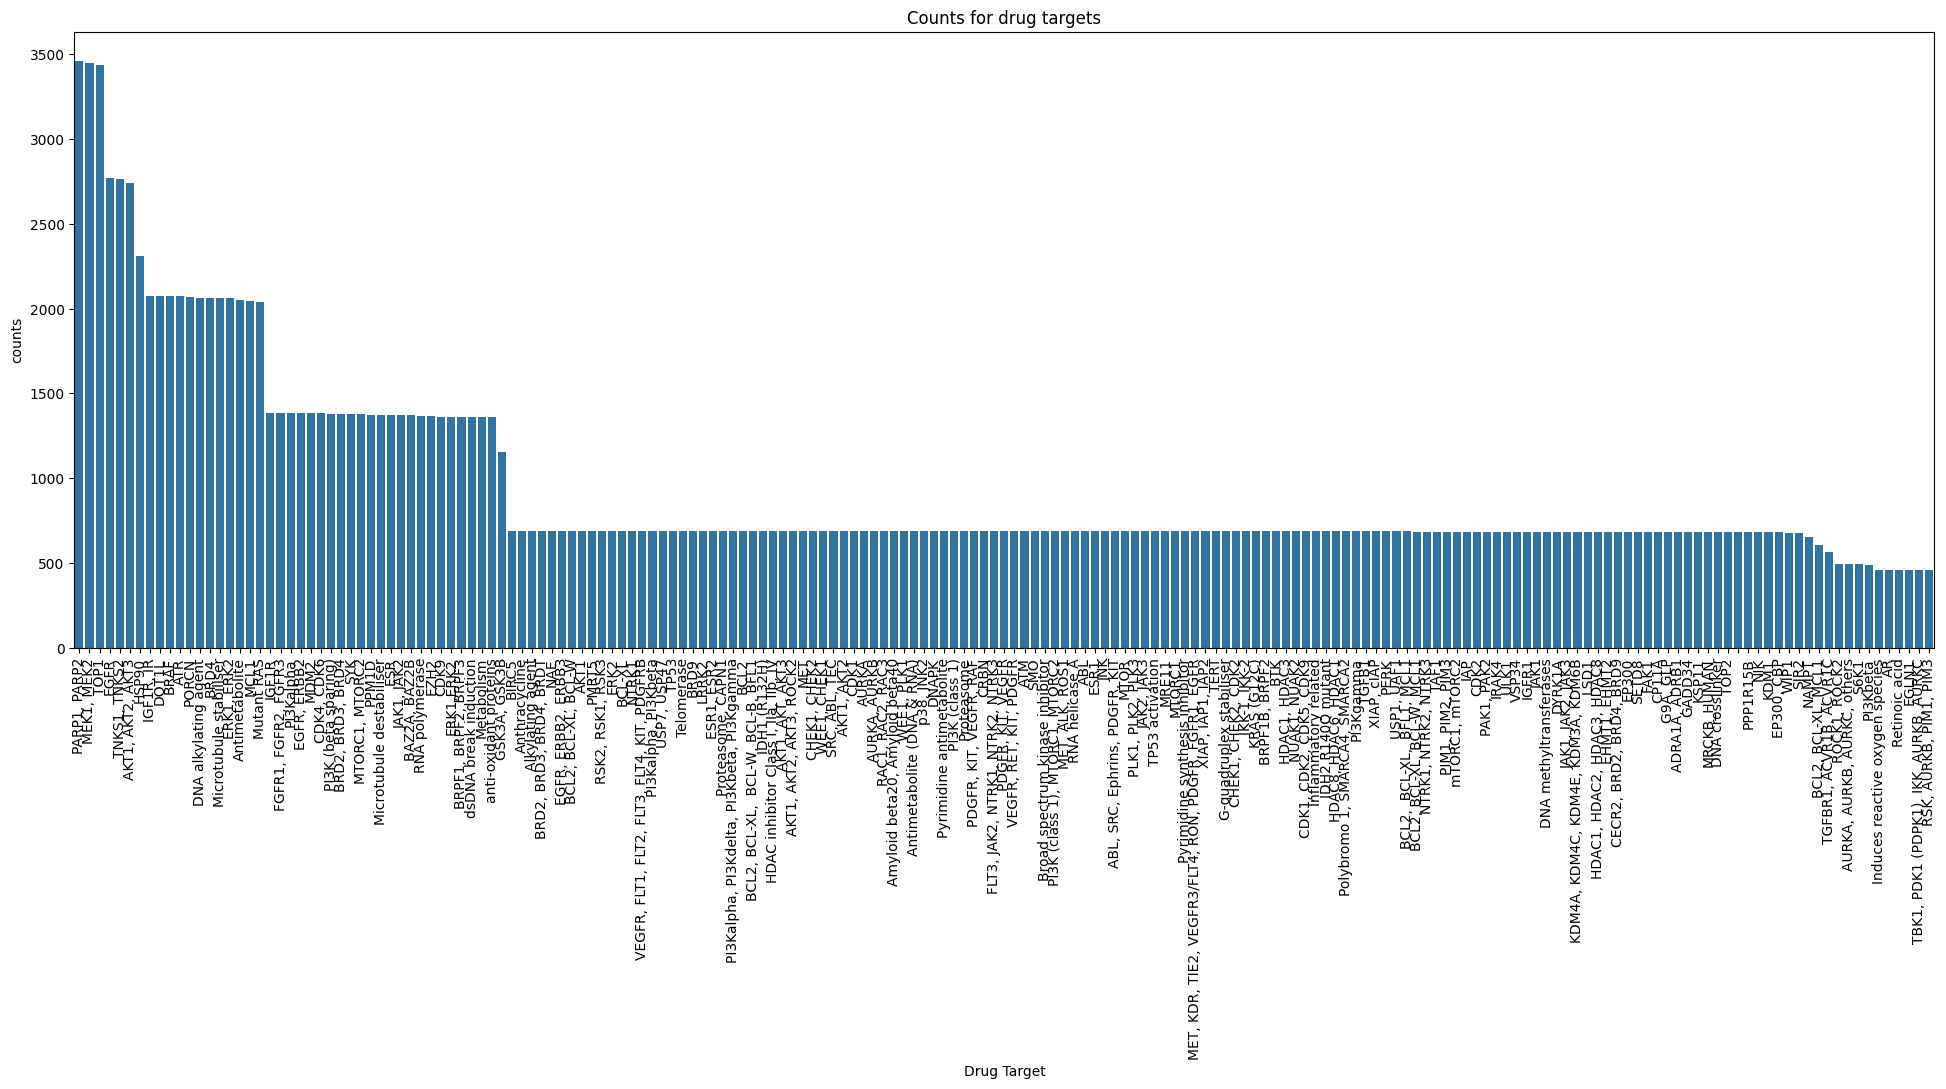

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 24,8

df1=df['Drug target'].value_counts().to_frame('counts').reset_index()

ax=sns.barplot(data=df1, x="index", y="counts")
ax.set(xlabel='Drug Target')
ax.set_title("Counts for drug targets")
plt.xticks(rotation=90)

plt.show()

In [5]:
df.columns

Index(['Drug name', 'Drug ID', 'Drug target', 'Target Pathway', 'Feature Name',
       'n_feature_pos', 'n_feature_neg', 'ic50_effect_size',
       'log_ic50_mean_pos', 'log_ic50_mean_neg', 'log_max_conc_tested',
       'log_max_conc_tested_2', 'feature_ic50_t_pval',
       'feature_delta_mean_ic50', 'feature_pos_ic50_var',
       'feature_neg_ic50_var', 'feature_pval', 'tissue_pval', 'msi_pval',
       'fdr', 'Tissue Type', 'Screening Set'],
      dtype='object')

   index                    Drug target  Drug name
0      0                                       681
1      1                            ABL        692
2      2  ABL, SRC, Ephrins, PDGFR, KIT        691
3      3                  ADRA1A, ADRB1        681
4      4                           AKT1        692


Text(0.5, 1.0, 'Drug name related with the target')

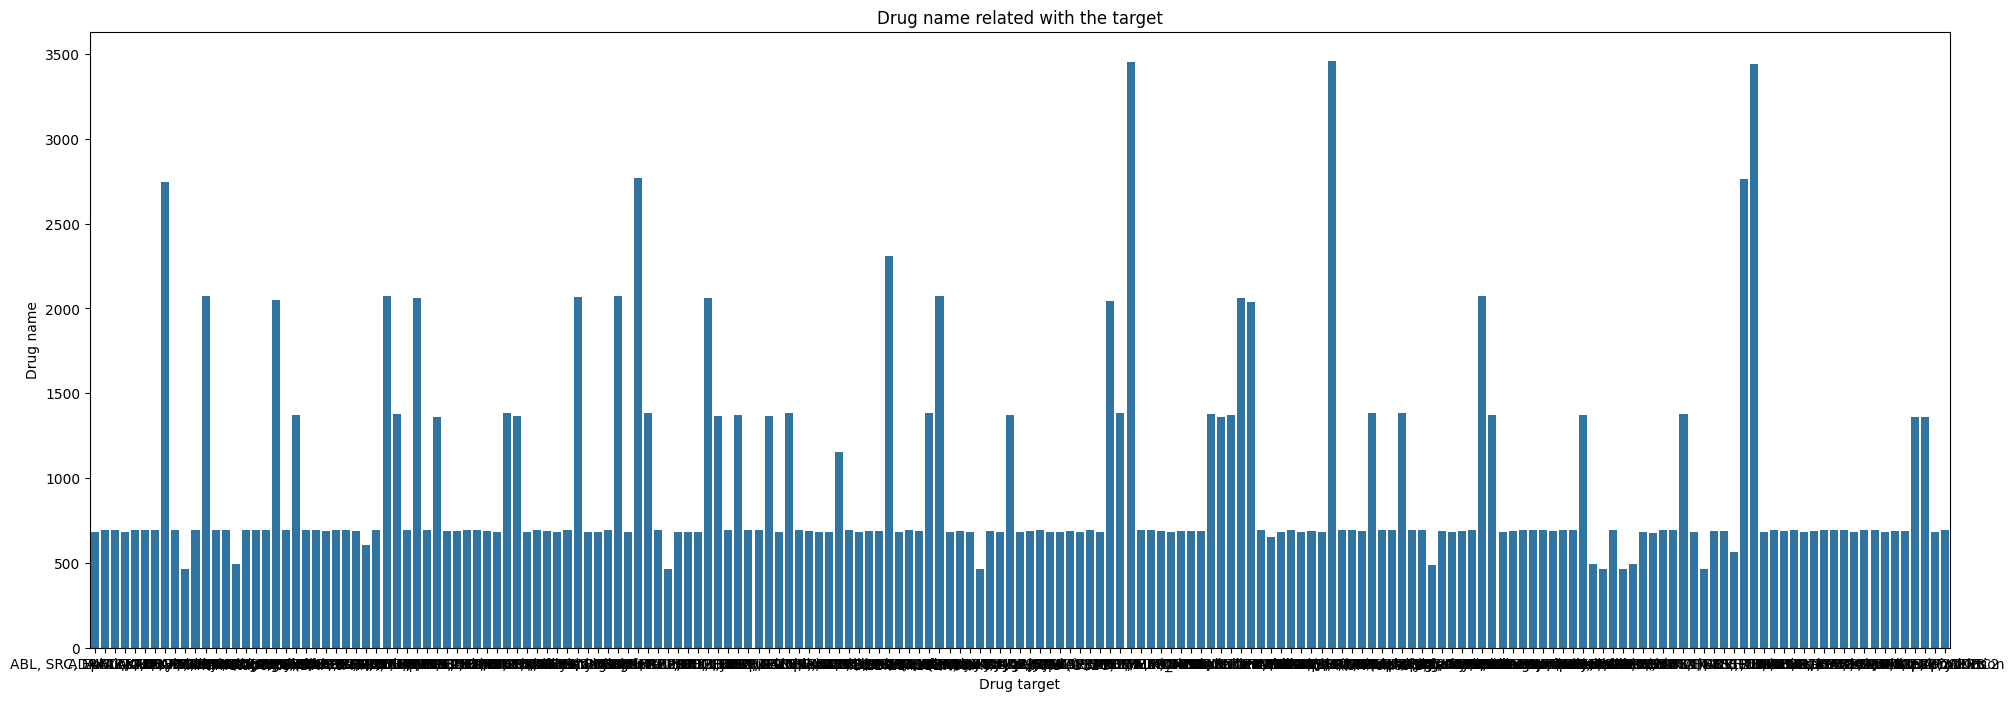

In [6]:
df1=df.groupby(['Drug target'], as_index=False)['Drug name'].count().reset_index()
print(df1.head())
ax=sns.barplot(data=df1, x="Drug target", y="Drug name")
ax.set(xlabel='Drug target', ylabel='Drug name')
ax.set_title("Drug name related with the target")

In [7]:
y=df['Drug target'].values.tolist()
to_remove=['Drug target', 'log_max_conc_tested', 'log_max_conc_tested_2']
df.drop(to_remove, axis=1, inplace=True)
print(df.shape)
df.head()
X=df.values.tolist()

(200920, 19)


In [8]:
from sklearn import preprocessing
str_cols=['Drug name', 'Target Pathway', 'Feature Name', 'Tissue Type', 'Screening Set']
for val in str_cols:
  le = preprocessing.LabelEncoder()
  df[val]=le.fit_transform(df[val])
df.head()

,Drug name,Drug ID,Target Pathway,Feature Name,n_feature_pos,n_feature_neg,ic50_effect_size,log_ic50_mean_pos,log_ic50_mean_neg,feature_ic50_t_pval,feature_delta_mean_ic50,feature_pos_ic50_var,feature_neg_ic50_var,feature_pval,tissue_pval,msi_pval,fdr,Tissue Type,Screening Set
0,73,1003,7,0,16,949,0.558749,-1.246496,-2.272739,0.020408,1.026243,1.573705,1.840537,0.064075,0.0,0.104496,63.648775,0,0
1,73,1003,7,1,7,958,0.372950,-2.937134,-2.250744,0.406853,-0.686390,2.032137,1.839168,0.863591,0.0,0.105126,91.654724,0,0
2,73,1003,7,2,11,954,0.159477,-1.965458,-2.259070,0.531182,0.293612,1.490027,1.844422,0.849671,0.0,0.105125,91.388313,0,0
3,73,1003,7,3,3,962,0.984927,-0.450478,-2.261353,0.292018,1.810875,2.213107,1.837730,0.288981,0.0,0.104923,73.552206,0,0
4,73,1003,7,4,22,943,0.037908,-2.187514,-2.257315,0.818542,0.069801,1.382058,1.850267,0.418768,0.0,0.105011,80.649802,0,0


In [9]:
X=df.values.tolist()

In [10]:
import pickle

with open('features.pkl', 'wb') as handle:
    pickle.dump(X, handle)

with open('labels.pkl', 'wb') as handle:
    pickle.dump(y, handle)

In [11]:
with open('col_names.pkl', 'wb') as handle:
    pickle.dump(list(df), handle)